## Cross Validation

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the dataset

In [2]:
path = r"C:\Users\admin\Documents\Sindhura\LMS Basic Python and DA\datasets\Cars93.csv"

In [7]:
import pandas as pd
df = pd.read_csv(path,na_values=["NA",""],keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Basic Data quality checks

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [9]:
s = df.isna().sum()
s[s>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

## Seaprate X and Y :=> Independent features and Dependent features

In [10]:
X = df.drop(columns=["id","Weight"])
Y=  df[["Weight"]]

In [11]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [12]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


## Feature Engineering
## Data PreProcessing and Data Cleaning

In [13]:
cat = list(X.columns[X.dtypes=="object"])
con = list(X.columns[X.dtypes!="object"])

In [14]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [15]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [17]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant",fill_value="NotAvailable"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False)
)

In [18]:
con_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [21]:
pre = ColumnTransformer([
    ("cat",cat_pipe,cat),
    ("con",con_pipe,con)
]).set_output(transform="pandas")

In [22]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NotAvailable',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room'])])

In [23]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__Manufacturer_Acura,cat__Manufacturer_Audi,cat__Manufacturer_BMW,cat__Manufacturer_Buick,cat__Manufacturer_Cadillac,cat__Manufacturer_Chevrolet,cat__Manufacturer_Chrylser,cat__Manufacturer_Chrysler,cat__Manufacturer_Dodge,cat__Manufacturer_Eagle,...,con__RPM,con__Rev.per.mile,con__Fuel.tank.capacity,con__Passengers,con__Length,con__Wheelbase,con__Width,con__Turn.circle,con__Rear.seat.room,con__Luggage.room
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.449727,-1.037572
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.740403,0.391972
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.060329,0.034586
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.080441,1.106743
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.279708,-0.322800


## Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.8,random_state=21)

In [25]:
xtrain.head()

,cat__Manufacturer_Acura,cat__Manufacturer_Audi,cat__Manufacturer_BMW,cat__Manufacturer_Buick,cat__Manufacturer_Cadillac,cat__Manufacturer_Chevrolet,cat__Manufacturer_Chrylser,cat__Manufacturer_Chrysler,cat__Manufacturer_Dodge,cat__Manufacturer_Eagle,...,con__RPM,con__Rev.per.mile,con__Fuel.tank.capacity,con__Passengers,con__Length,con__Wheelbase,con__Width,con__Turn.circle,con__Rear.seat.room,con__Luggage.room
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.304365,0.187910,-0.663618,-0.083243,-0.564892,0.155356,-0.632239,-1.546214,-0.619745,-0.680186
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.054464,0.157535,-1.062184,-0.083243,-0.840305,-0.876650,-0.632239,-0.922362,0.060329,-0.680186
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.212025,-0.247462,0.716035,-0.083243,0.467905,0.450214,0.165927,1.261120,-0.109689,0.034586
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.875050,-0.713210,0.409445,0.884457,1.294143,1.334791,1.230149,0.325342,0.740403,0.391972
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.146804,-0.996708,1.022624,0.884457,2.464647,1.924508,2.028316,1.884972,1.250459,2.893672


In [26]:
xtest.head()

,cat__Manufacturer_Acura,cat__Manufacturer_Audi,cat__Manufacturer_BMW,cat__Manufacturer_Buick,cat__Manufacturer_Cadillac,cat__Manufacturer_Chevrolet,cat__Manufacturer_Chrylser,cat__Manufacturer_Chrysler,cat__Manufacturer_Dodge,cat__Manufacturer_Eagle,...,con__RPM,con__Rev.per.mile,con__Fuel.tank.capacity,con__Passengers,con__Length,con__Wheelbase,con__Width,con__Turn.circle,con__Rear.seat.room,con__Luggage.room
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.809828,0.532158,-0.816912,-0.083243,-0.771452,-1.024079,-0.632239,-0.298510,-0.449727,-0.322800
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.472853,0.370159,0.961306,1.852158,0.261346,1.334791,0.431983,0.637268,2.440589,0.034586
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.201098,-0.237337,-0.265051,-0.083243,0.467905,0.007926,-0.632239,-0.610436,0.570385,0.034586
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.809828,-1.108083,-0.203734,0.884457,1.362996,0.892502,-0.100128,1.573046,2.780626,1.106743
17,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.820755,-1.988953,1.942392,0.884457,2.120381,1.777079,2.028316,0.949194,0.570385,2.178901


In [27]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [28]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


## Model Building

In [29]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
model.fit(xtrain,ytrain)

Ridge(alpha=1)

In [30]:
model.score(xtrain,ytrain)

0.9977457209070741

In [31]:
model.score(xtest,ytest)

0.9326745267513092

## Hyperparameter Tuning

In [32]:
import numpy as np
params = {
    "alpha": np.arange(start=0.1,stop=100,step=0.1)
}

In [33]:
params

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [34]:
from sklearn.model_selection import GridSearchCV,cross_val_score
base_model = Ridge()
gscv = GridSearchCV(estimator=base_model,param_grid=params,scoring="r2")
gscv.fit(xtrain,ytrain)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5...
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='r2')

    from sklearn.model_selection import GridSearchCV,cross_val_score
    base_model = Ridge()
    gscv = GridSearchCV(estimator=base_model,param_grid=params,scoring="r2",cv=5)
    gscv.fit(xtrain,ytrain)

In [35]:
gscv.best_params_

{'alpha': 10.5}

In [36]:
gscv.best_score_

0.9301509644784082

In [37]:
best_ridge= gscv.best_estimator_
best_ridge

Ridge(alpha=10.5)

## Cross Validation
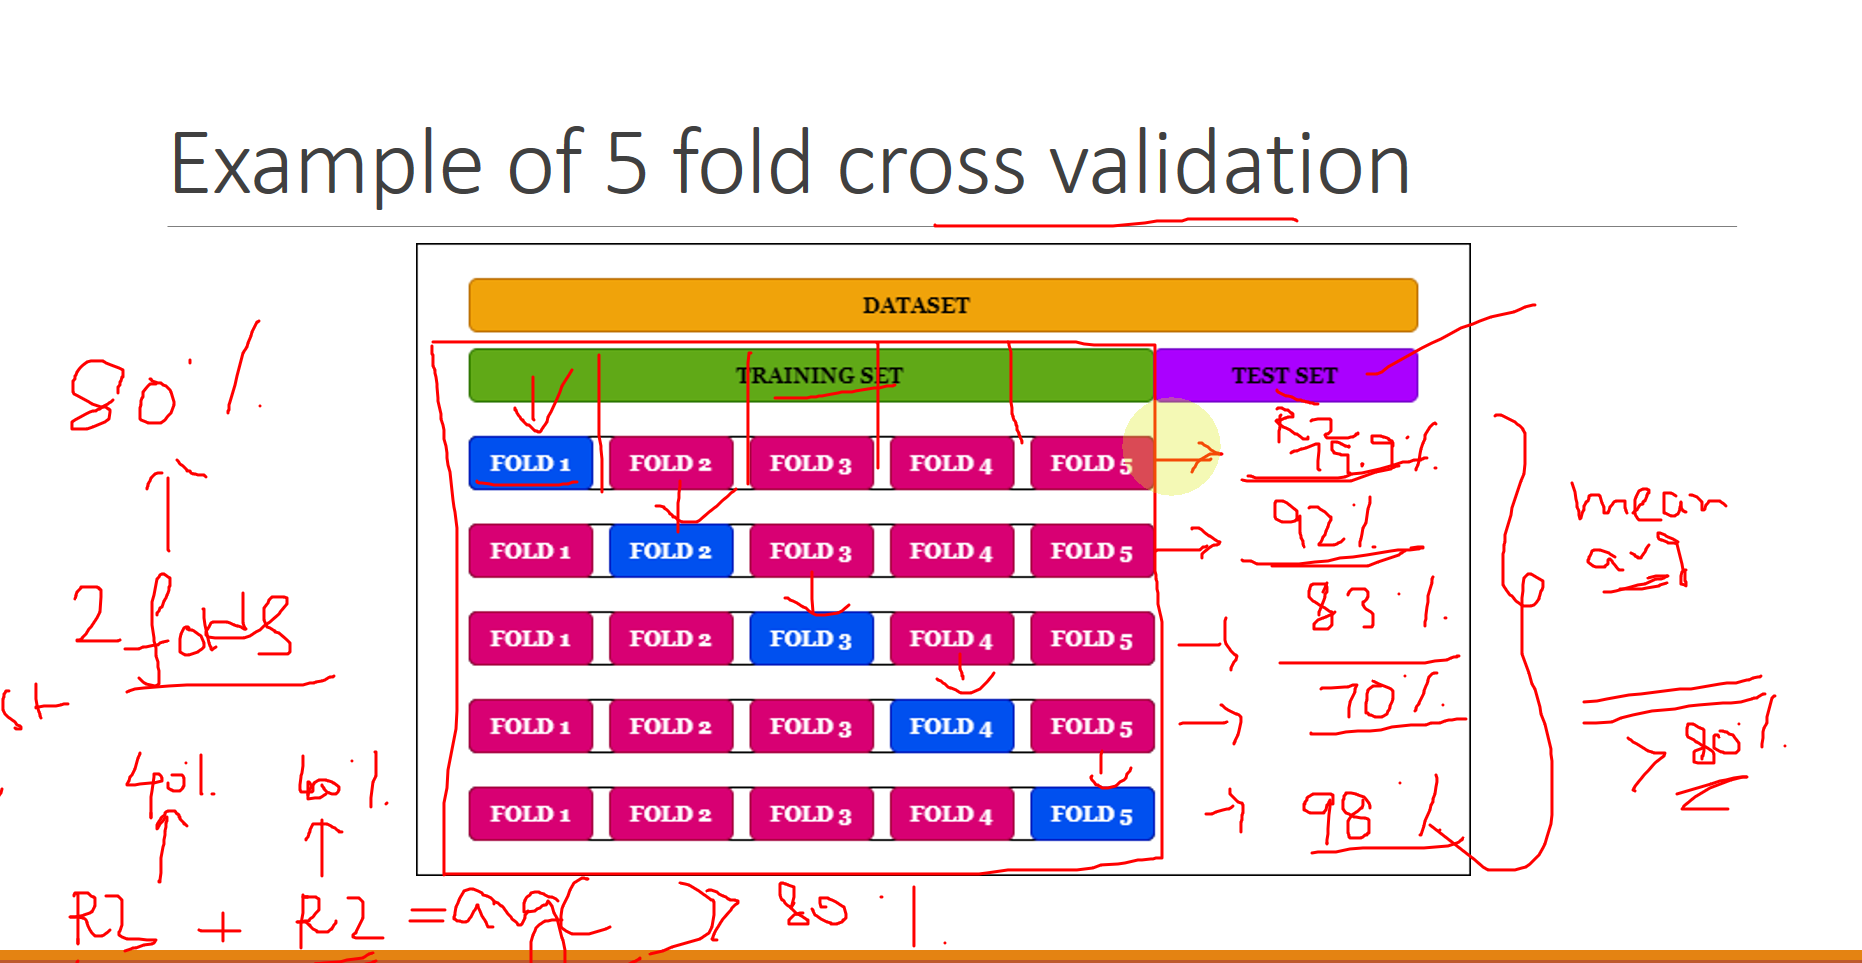

In [38]:
scores = cross_val_score(best_ridge,xtrain,ytrain,cv=5,scoring="r2")

In [39]:
scores

array([0.95427859, 0.92435167, 0.96339403, 0.90472038, 0.90401016])

In [40]:
scores.mean()

0.9301509644784082

In [41]:
gscv2 = GridSearchCV(estimator=base_model,param_grid=params,scoring="r2",cv=3)
gscv2.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7....
       92.5, 92.6, 92.7, 92.8, 92.9, 93. , 93.1, 93.2, 93.3, 93.4, 93.5,
       93.6, 93.7, 93.8, 93.9, 94. , 94.1, 94.2, 94.3, 94.4, 94.5, 94.6,
       94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6, 95.7,
       95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7, 96.8,
       96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9,
       98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. ,
       99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9])},
             scoring='r2')

In [43]:
gscv2.score(xtrain,ytrain
            )

0.981860031322258

In [44]:
gscv2.score(xtest,ytest)

0.9331055433250959

In [45]:
gscv2.best_params_

{'alpha': 7.5}

In [46]:
best_ridge2 = gscv2.best_estimator_
best_ridge2

Ridge(alpha=7.5)

In [47]:
scores2 = cross_val_score(best_ridge2,xtrain,ytrain,scoring="r2",cv=3)

In [48]:
scores2

array([0.91969657, 0.9632135 , 0.89285626])

In [49]:
scores2.mean()

0.9252554472890674

## Model Evaluation

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
ypred = model.predict(xtest)
ypred[:5]

array([[2575.94913168],
       [3621.10651845],
       [3045.2896841 ],
       [3333.95764131],
       [3976.63336871]])

In [53]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


In [54]:
mse = mean_squared_error(ytest,ypred)
mse

24418.74400042873

In [55]:
rmse = mse**(0.5)
rmse

156.26498008328267

In [56]:
mae = mean_absolute_error(ytest,ypred)
mae

114.62692052499551

In [57]:
r2 = r2_score(ytest,ypred)
r2

0.9326745267513092

## Model score is greater than 80% and cross validation score is also greater than 80%

## OUt of sample predictions

In [58]:
path2 = r"C:\Users\admin\Documents\Sindhura\LMS Basic Python and DA\datasets\sample_cars93.csv"

In [59]:
xnew= pd.read_csv(path2,na_values=["","NA"],keep_default_na=False)
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [61]:
xnew_pre = pre.transform(xnew)
xnew_pre

,cat__Manufacturer_Acura,cat__Manufacturer_Audi,cat__Manufacturer_BMW,cat__Manufacturer_Buick,cat__Manufacturer_Cadillac,cat__Manufacturer_Chevrolet,cat__Manufacturer_Chrylser,cat__Manufacturer_Chrysler,cat__Manufacturer_Dodge,cat__Manufacturer_Eagle,...,con__RPM,con__Rev.per.mile,con__Fuel.tank.capacity,con__Passengers,con__Length,con__Wheelbase,con__Width,con__Turn.circle,con__Rear.seat.room,con__Luggage.room
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.410659,-0.510323,0.884457,0.467905,0.302785,-1.164350,-0.610436,1.080441,1.106743
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.135877,0.673908,-0.449005,-0.083243,-0.151773,-0.434362,-0.898295,0.013416,-0.959782,-0.322800
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.135877,0.532158,-0.050439,0.884457,1.018731,0.597644,0.431983,0.325342,0.230348,0.749357
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.054464,-0.014589,1.022624,-2.986345,-0.978011,-1.171509,-0.100128,-0.610436,-0.109689,0.034586
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.369586,0.441034,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-1.546214,-0.619745,-1.394958


In [63]:
weights = best_ridge.predict(xnew_pre)
weights

array([[3291.26898223],
       [2684.82491616],
       [3141.01417598],
       [2964.89059355],
       [2271.67954712]])

## Save the output to dataframe and then to a csv file

In [65]:
xnew["Weights Predicted"] = weights
xnew = xnew.round()
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weights Predicted
0,Audi,100,Midsize,31.0,38.0,45.0,19,26,NaN,Front,...,6,190,106,65,37,31.0,17.0,non-USA,Audi 100,3291.0
1,Pontiac,Sunbird,Compact,9.0,11.0,13.0,23,31,None,Front,...,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird,2685.0
2,Chevrolet,Lumina,Midsize,13.0,16.0,18.0,21,29,None,Front,...,6,198,108,71,40,28.0,16.0,USA,Chevrolet Lumina,3141.0
3,Mazda,RX-7,Sporty,32.0,32.0,32.0,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7,2965.0
4,Volkswagen,Fox,Small,9.0,9.0,10.0,25,33,None,Front,...,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox,2272.0


In [66]:
xnew.to_csv("CV Results.csv",index=False)